# HOMEWORK 3: Classifying Wines with Support Vector Machines (SVM)

The objective of this exercise is to build and evaluate a Support Vector Machine (SVM) model for classifying wines based on their chemical properties using the Wine dataset available in scikit-learn. You will explore various aspects of SVM model training and optimization, including preprocessing steps, hyperparameter tuning, and kernel selection.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading the Dataset

Load the Wine dataset using load_wine from sklearn.datasets.
Inspect the dataset to understand its structure and features.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine_data = load_wine()
print("Keys of the Wine dataset:", wine_data.keys()) # Display the keys of the dataset
print("\nFeature names:", wine_data.feature_names) # Display the feature names
print("\nTarget names:", wine_data.target_names) # Display the target names

# Create a DataFrame to inspect the data
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

print("\nFirst few rows of the dataset:")
print(wine_df.head())

print("\nBasic statistics of the features:")
print(wine_df.describe())

Keys of the Wine dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: ['class_0' 'class_1' 'class_2']

First few rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28           

#Data Preprocessing

- Split the dataset into features and target labels.
- Split the data into training and testing sets using train_test_split from sklearn.model_selection.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target labels
X = wine_data.data  # Features
y = wine_data.target  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # we use random_state=42 in order to have the same outcome every time

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (133, 13)
Shape of X_test: (45, 13)
Shape of y_train: (133,)
Shape of y_test: (45,)


# Baseline Model

Train a baseline SVM model using default hyperparameters.
Evaluate the model's performance on the testing set using metrics like accuracy, precision, recall, and F1-score. Experiment with different kernel functions (e.g., linear, polynomial, RBF) and observe their effects on model performance.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

baseline_model = SVC(random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate baseline model on the testing set
y_pred_baseline = baseline_model.predict(X_test)

print("Baseline Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Precision:", precision_score(y_test, y_pred_baseline, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_baseline, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_baseline, average='weighted'))

# Experiment with different kernel functions
kernel_functions = ['linear', 'poly', 'rbf']

for kernel in kernel_functions:
    # Create SVM model with the specified kernel
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    # Print metrics for the current kernel
    print("\nMetrics for SVM with {} kernel:".format(kernel))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Baseline Model Metrics:
Accuracy: 0.7111111111111111
Precision: 0.6994708994708995
Recall: 0.7111111111111111
F1-Score: 0.7015873015873016

Metrics for SVM with linear kernel:
Accuracy: 0.9777777777777777
Precision: 0.9794871794871796
Recall: 0.9777777777777777
F1-Score: 0.9779047619047618

Metrics for SVM with poly kernel:
Accuracy: 0.7555555555555555
Precision: 0.7518162393162394
Recall: 0.7555555555555555
F1-Score: 0.7027826653633105

Metrics for SVM with rbf kernel:
Accuracy: 0.7111111111111111
Precision: 0.6994708994708995
Recall: 0.7111111111111111
F1-Score: 0.7015873015873016


#Data Normalization

Standardize the features using StandardScaler from sklearn.preprocessing.
Explore the effects of data normalization on model performance with different normalization techniques.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline SVM model with standardized features
baseline_model_scaled = SVC(random_state=42)
baseline_model_scaled.fit(X_train_scaled, y_train)

# Evaluate baseline model on the testing set with standardized features
y_pred_baseline_scaled = baseline_model_scaled.predict(X_test_scaled)

# Print metrics for the baseline model with standardized features
print("Baseline Model Metrics with Standardization:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline_scaled))
print("Precision:", precision_score(y_test, y_pred_baseline_scaled, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_baseline_scaled, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_baseline_scaled, average='weighted'))


for kernel in kernel_functions:
    # Create SVM model with the specified kernel after standardization
    svm_model_scaled = SVC(kernel=kernel, random_state=42)
    svm_model_scaled.fit(X_train_scaled, y_train)

    # Evaluate the model on the testing set with standardized features
    y_pred_scaled = svm_model_scaled.predict(X_test_scaled)

    # Print metrics for the current kernel after standardization
    print("\nMetrics for SVM with {} kernel after standardization:".format(kernel))
    print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
    print("Precision:", precision_score(y_test, y_pred_scaled, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred_scaled, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred_scaled, average='weighted'))

Baseline Model Metrics with Standardization:
Accuracy: 0.9777777777777777
Precision: 0.9789473684210527
Recall: 0.9777777777777777
F1-Score: 0.9775949862906386

Metrics for SVM with linear kernel after standardization:
Accuracy: 0.9777777777777777
Precision: 0.9794871794871796
Recall: 0.9777777777777777
F1-Score: 0.9779047619047618

Metrics for SVM with poly kernel after standardization:
Accuracy: 0.9777777777777777
Precision: 0.9789473684210527
Recall: 0.9777777777777777
F1-Score: 0.9776949363156261

Metrics for SVM with rbf kernel after standardization:
Accuracy: 0.9777777777777777
Precision: 0.9789473684210527
Recall: 0.9777777777777777
F1-Score: 0.9775949862906386


#Hyperparameter Tuning

Perform hyperparameter tuning to find the best combination of hyperparameters for the SVM model.
Tune hyperparameters such as C (regularization parameter) and the choice of kernel (linear, polynomial, RBF).
Use techniques like GridSearchCV or RandomizedSearchCV from sklearn.model_selection to efficiently search through the hyperparameter space.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel functions
}

svm_model_tuned = SVC(random_state=42)

grid_search = GridSearchCV(svm_model_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_svm_model = grid_search.best_estimator_
y_pred_tuned = best_svm_model.predict(X_test_scaled)

print("Metrics for Tuned SVM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tuned, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tuned, average='weighted'))

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Metrics for Tuned SVM Model:
Accuracy: 0.9777777777777777
Precision: 0.9794871794871796
Recall: 0.9777777777777777
F1-Score: 0.9779047619047618


#Effects of Data Size

Explore the effects of varying the size of the training data on model performance.
Train SVM models using different proportions of the training data (change the number of CV folds) and observe how performance changes. Visualize the relationship between training size and model performance.

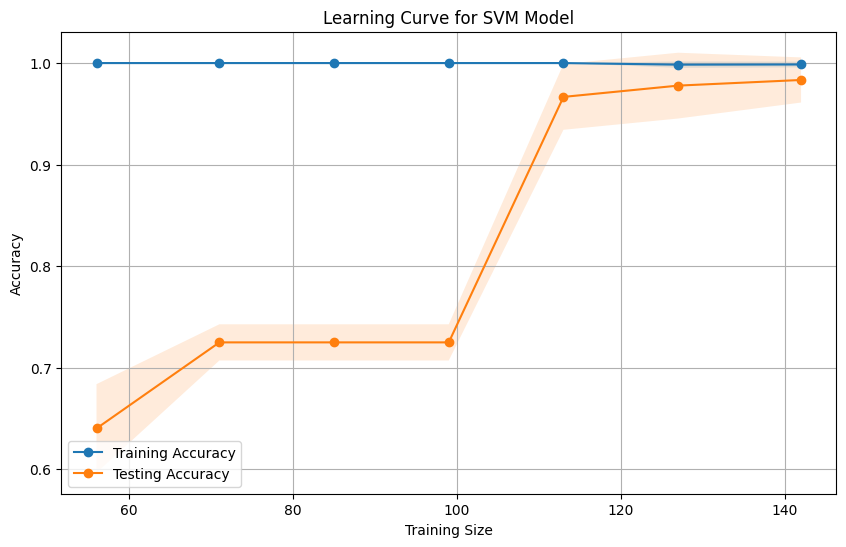

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
import numpy as np

X_scaled = scaler.fit_transform(X)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_scaled, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Visualize:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, marker='o', label='Testing Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)

plt.title('Learning Curve for SVM Model')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Evaluate the final tuned SVM model on the testing set using various performance metrics.
Plot confusion matrices to visualize the model's predictions.
Discuss the results and insights gained from the experimentation.

Metrics for Tuned SVM Model:
Accuracy: 0.9777777777777777
Precision: 0.9794871794871796
Recall: 0.9777777777777777
F1-Score: 0.9779047619047618


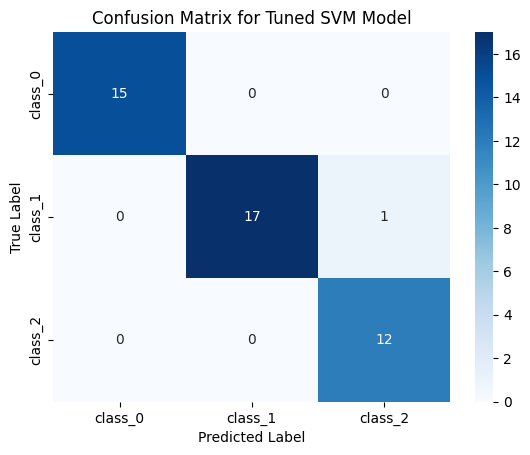

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_svm_model = grid_search.best_estimator_
y_pred_tuned = best_svm_model.predict(X_test_scaled)

# Print metrics for the tuned model
print("Metrics for Tuned SVM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tuned, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_tuned, average='weighted'))

# Plot confusion matrix
# I use the heatmap in order to visualize the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Confusion Matrix for Tuned SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()